In [ ]:
#option to open .fits with astropy instead of fitsio

import fitsio
data = fitsio.read('lvdb_v1.fits')

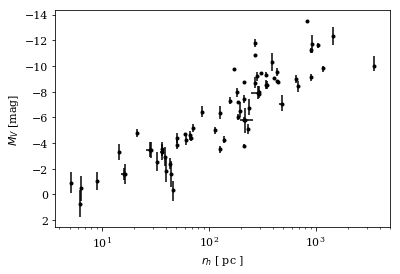

In [4]:
#Create plot of rhalf vs m_v
from astropy.io import fits 
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_open = fits.open('lvdb_v1.fits')
data = Table(d_open[1].data)

d_kpc = data['distance_kpc']
d_kpc_ep = data['distance_kpc_ep']
d_kpc_em = data['distance_kpc_em']

m_v = data['m_v']
m_v_ep = data['m_v_ep']
m_v_em = data['m_v_em']

rhalf = data['rhalf']
rhalf_ep = data['rhalf_ep']
rhalf_em = data['rhalf_em']

#derived values
rhalf_pc = d_kpc * 1000. * np.radians(rhalf / 60.)
rhalf_em = d_kpc_em * 1000 * np.radians(rhalf_em / 60)
rhalf_ep = d_kpc_ep * 1000 * np.radians(rhalf_ep / 60)

font = {'family' : 'serif', 'weight' : 'normal', 'size': 11}

plt.rc('font', **font)
plt.semilogx(rhalf_pc, m_v, c='black', marker = '.', ls= 'none')
plt.errorbar(rhalf_pc, m_v, yerr=(m_v_ep,m_v_em), xerr=(rhalf_em,rhalf_ep), c='black',ls='none')
plt.xlabel(r'$r_h$ [ pc ]')
plt.ylabel(r'$M_V$ [mag]')
plt.gca().invert_yaxis()
plt.show()

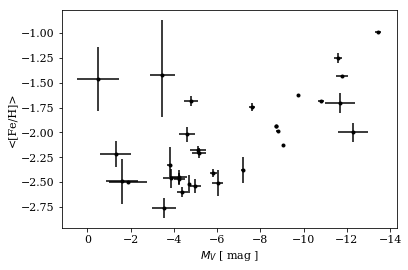

In [5]:
#Create a plot of m_v vs metallicity
from astropy.io import fits 
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_open = fits.open('lvdb_v1.fits')
data = Table(d_open[1].data)

m_v = data['m_v']
m_v_em = data['m_v_em']
m_v_ep = data['m_v_ep']

metal = data['average_metallicity']
metal_em = data['average_metallicity_em']
metal_ep = data['average_metallicity_ep']

font = {'family' : 'serif', 'weight' : 'normal', 'size': 11}

plt.rc('font', **font)
plt.scatter(m_v, metal, c='black', marker = '.')
plt.errorbar(m_v, metal, xerr=(m_v_em,m_v_ep),yerr=(metal_em,metal_ep), color='black', ls='none')
plt.xlabel(r'$M_V$ [ mag ]')
plt.ylabel('<[Fe/H]>')
plt.gca().invert_xaxis()
plt.show()

/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


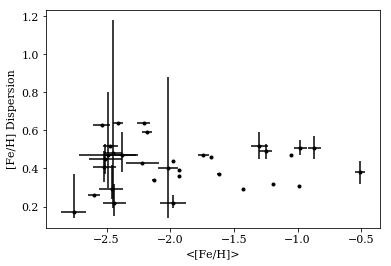

In [9]:
#Create a plot of metallicity vs metallicity dispersion
from astropy.io import fits 
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_open = fits.open('lvdb_v1.fits')
data = Table(d_open[1].data)

metal = data['average_metallicity'][np.where(data['metallicity_dispersion'] > -0.)]#removes values with error codes -9999, etc.
metal_em = data['average_metallicity_em'][np.where(data['metallicity_dispersion'] > -0.)]
metal_ep = data['average_metallicity_ep'][np.where(data['metallicity_dispersion'] > -0.)]

metaldisp = data['metallicity_dispersion'][np.where(data['metallicity_dispersion'] > -0.)]
metaldisp_em = data['metallicity_dispersion_em'][np.where(data['metallicity_dispersion'] > -0.)]
metaldisp_ep = data['metallicity_dispersion_ep'][np.where(data['metallicity_dispersion'] > -0.)]

font = {'family' : 'serif', 'weight' : 'normal', 'size': 11}

plt.rc('font', **font)
plt.scatter(metal,metaldisp, c='black', marker = '.')
plt.errorbar(metal,metaldisp,xerr=(metal_em,metal_ep),yerr=(metaldisp_em,metaldisp_ep), color='black',ls='none')
plt.ylabel('[Fe/H] Dispersion')
plt.xlabel('<[Fe/H]>')
plt.show()

/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/home/astrolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/hom

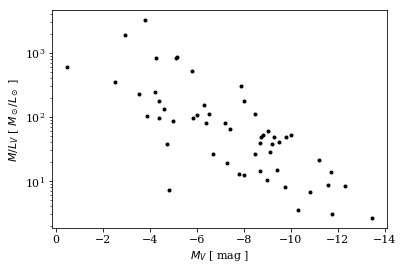

In [7]:
#Create a plot of m_v vs mass/light 
from astropy.io import fits 
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_open = fits.open('lvdb_v1.fits')
data = Table(d_open[1].data)

def lum(m_x, m_x_sun=4.83):
    return pow(10., -.4*(m_x - m_x_sun) )

vdisp = data['velocity_dispersion'][np.where(data['velocity_dispersion'] > 0)]#removes values with error codes: -9999, etc.
vdisp_em = data['velocity_dispersion_em'][np.where(data['velocity_dispersion'] > 0)]
vdisp_ep = data['velocity_dispersion_ep'][np.where(data['velocity_dispersion'] > 0)]

rhalf = data['rhalf'][np.where(data['velocity_dispersion'] > 0)]
rhalf_em = data['rhalf_em'][np.where(data['velocity_dispersion'] > 0)]
rhalf_ep = data['rhalf_ep'][np.where(data['velocity_dispersion'] > 0)]

d_kpc = data['distance_kpc'][np.where(data['velocity_dispersion'] > 0)]
d_kpc_em = data['distance_kpc_em'][np.where(data['velocity_dispersion'] > 0)]
d_kpc_ep = data['distance_kpc_ep'][np.where(data['velocity_dispersion'] > 0)]

m_v = data['m_v'][np.where(data['velocity_dispersion'] > 0)]
m_v_em = data['m_v_em'][np.where(data['velocity_dispersion'] > 0)]
m_v_ep = data['m_v_ep'][np.where(data['velocity_dispersion'] > 0)]


#derived values
rh_pc = d_kpc * 1000. * np.radians(rhalf / 60.)
rh_pc_em = d_kpc_em * 1000. * np.radians(rhalf_em / 60.)
rh_pc_ep = d_kpc_ep * 1000. * np.radians(rhalf_ep / 60.)

dynamical_mass = 580. * rh_pc * vdisp*vdisp
dynamical_mass_em = 580. * rh_pc_em * vdisp_em * vdisp_em
dynamical_mass_ep = 580. * rh_pc_ep * vdisp_ep * vdisp_ep

luminosity = lum(m_v, m_x_sun=4.83)
luminosity_em = lum(m_v_em, m_x_sun=4.83)
luminosity_ep = lum(m_v_ep, m_x_sun=4.83)
    
masslight = dynamical_mass / luminosity  
masslight_em = dynamical_mass_em / luminosity_em 
masslight_ep = dynamical_mass_ep / luminosity_ep

font = {'family' : 'serif', 'weight' : 'normal', 'size': 11}

plt.rc('font', **font)

plt.semilogy(m_v, masslight, c='black', marker = '.', ls='none')
#plt.errorbar(m_v, masslight, xerr=(m_v_em,m_v_ep), yerr=(masslight_em, masslight_ep), color='black', ls='none')
plt.gca().invert_xaxis()
plt.xlabel(r'$M_V$ [ mag ] ')
plt.ylabel(r'$M / L_V $ [ $M_\odot / L_\odot$ ] ')
plt.show()